## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio.

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*.

Question *7* is about data ethics issue.

In [1]:
your_name = "Rachit Kumar Agrawal"
your_student_id = "48046493"

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [3]:
read_csv = pd.read_csv('car_sells_clean_data.csv')
print(len(read_csv))

3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [4]:
print(read_csv.head())
read_csv.info()

from sklearn.preprocessing import OrdinalEncoder
# Copying the dataset to avoid modifying the original
data_copy = read_csv.copy()
encoder = OrdinalEncoder()
# Encoding categorical features: seller_type, fuel, and owner
data_copy[['seller_type', 'fuel', 'owner']] = encoder.fit_transform(data_copy[['seller_type', 'fuel', 'owner']])
selected_columns = ['year', 'km_driven', 'seller_type', 'fuel', 'owner', 'selling_price']
# Calculating the correlation matrix for the selected features
correlation_with_selling_price = data_copy[selected_columns].corr()['selling_price']
print(correlation_with_selling_price)
# Identifying the most and least correlated features with selling_price
most_correlated = correlation_with_selling_price.idxmax()
least_correlated = correlation_with_selling_price.idxmin()
print(f"\nMost correlated feature: {most_correlated} with correlation {correlation_with_selling_price[most_correlated]:.2f}")
print(f"Least correlated feature: {least_correlated} with correlation {correlation_with_selling_price[least_correlated]:.2f}")


                       name    year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007.0          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007.0         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012.0         600000     100000  Diesel   
3    Datsun RediGO T Option  2017.0         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014.0         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3

# Explaination & Analysis for Q.2

*   The most correlated feature is selling price with correlation 1.00
*   The least correleated feature is fuel with correlation -0.28

If year is the most correlated, it suggests that newer cars tend to have higher prices, and including year in a regression model would likely improve its accuracy.

If owner is the least correlated, it suggests that the number of previous owners may not have a strong effect on the selling price. Including this feature in the model might not contribute much to the prediction accuracy.

Strongly Correlated Features: Including strongly correlated features will help the model make better predictions, as these features have a clear linear relationship with the target variable. Whereas, Including features with low or no correlation could introduce noise into the model, potentially leading to overfitting or reducing the model's performance








### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [5]:
# Defining X (features) and y (target)
X = read_csv.drop(columns=['selling_price'])
y = read_csv['selling_price']

# Case 1: Training data containing 10% of the entire data
X_case1_train, X_case1_test, y_case1_train, y_case1_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Case 2: Training data containing 90% of the entire data
X_case2_train, X_case2_test, y_case2_train, y_case2_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Printing the shapes of the training and testing sets for both cases
print("Case 1 - Training set shape:", X_case1_train.shape, y_case1_train.shape)
print("Case 1 - Testing set shape:", X_case1_test.shape, y_case1_test.shape)

print("Case 2 - Training set shape:", X_case2_train.shape, y_case2_train.shape)
print("Case 2 - Testing set shape:", X_case2_test.shape, y_case2_test.shape)

Case 1 - Training set shape: (365, 7) (365,)
Case 1 - Testing set shape: (3292, 7) (3292,)
Case 2 - Training set shape: (3291, 7) (3291,)
Case 2 - Testing set shape: (366, 7) (366,)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [14]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Using the selected most and least correlated features (replace with your actual features)
most_correlated_features = ['year', 'km_driven']  # Example
least_correlated_features = ['fuel', 'owner']     # Example

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Encode the categorical features in case 1
X_case1_train_least_encoded = X_case1_train[least_correlated_features].copy()
X_case1_test_least_encoded = X_case1_test[least_correlated_features].copy()

X_case1_train_least_encoded = encoder.fit_transform(X_case1_train_least_encoded)
X_case1_test_least_encoded = encoder.transform(X_case1_test_least_encoded)

# Encode the categorical features in case 2
X_case2_train_least_encoded = X_case2_train[least_correlated_features].copy()
X_case2_test_least_encoded = X_case2_test[least_correlated_features].copy()

X_case2_train_least_encoded = encoder.fit_transform(X_case2_train_least_encoded)
X_case2_test_least_encoded = encoder.transform(X_case2_test_least_encoded)

# Model-a: Case 1 with two most correlated features
X_case1_train_most = X_case1_train[most_correlated_features]
X_case1_test_most = X_case1_test[most_correlated_features]

model_a = LinearRegression()
model_a.fit(X_case1_train_most, y_case1_train)
y_pred_a = model_a.predict(X_case1_test_most)
mse_a = mean_squared_error(y_case1_test, y_pred_a)

# Model-b: Case 1 with two least correlated features (encoded)
model_b = LinearRegression()
model_b.fit(X_case1_train_least_encoded, y_case1_train)
y_pred_b = model_b.predict(X_case1_test_least_encoded)
mse_b = mean_squared_error(y_case1_test, y_pred_b)

# Model-c: Case 2 with two most correlated features
X_case2_train_most = X_case2_train[most_correlated_features]
X_case2_test_most = X_case2_test[most_correlated_features]

model_c = LinearRegression()
model_c.fit(X_case2_train_most, y_case2_train)
y_pred_c = model_c.predict(X_case2_test_most)
mse_c = mean_squared_error(y_case2_test, y_pred_c)

# Model-d: Case 2 with two least correlated features (encoded)
model_d = LinearRegression()
model_d.fit(X_case2_train_least_encoded, y_case2_train)
y_pred_d = model_d.predict(X_case2_test_least_encoded)
mse_d = mean_squared_error(y_case2_test, y_pred_d)

# Print the Mean Squared Errors for comparison
print("Model-a MSE (Case 1, Most Correlated):", mse_a)
print("Model-b MSE (Case 1, Least Correlated):", mse_b)
print("Model-c MSE (Case 2, Most Correlated):", mse_c)
print("Model-d MSE (Case 2, Least Correlated):", mse_d)


Model-a MSE (Case 1, Most Correlated): 258450435689.8825
Model-b MSE (Case 1, Least Correlated): 266681585015.41327
Model-c MSE (Case 2, Most Correlated): 160303155228.53854
Model-d MSE (Case 2, Least Correlated): 172632031305.7849


### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [21]:
# Function to calculate both MSE and RMSE
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Evaluate model-a (Case 1 with two most correlated features)
mse_a, rmse_a = evaluate_model(y_case1_test, y_pred_a)

# Evaluate model-b (Case 1 with two least correlated features)
mse_b, rmse_b = evaluate_model(y_case1_test, y_pred_b)

# Evaluate model-c (Case 2 with two most correlated features)
mse_c, rmse_c = evaluate_model(y_case2_test, y_pred_c)

# Evaluate model-d (Case 2 with two least correlated features)
mse_d, rmse_d = evaluate_model(y_case2_test, y_pred_d)

# Print the evaluation results for all models
print("Model-a (Case 1, Most Correlated) - MSE:", mse_a, ", RMSE:", rmse_a)
print("Model-b (Case 1, Least Correlated) - MSE:", mse_b, ", RMSE:", rmse_b)
print("Model-c (Case 2, Most Correlated) - MSE:", mse_c, ", RMSE:", rmse_c)
print("Model-d (Case 2, Least Correlated) - MSE:", mse_d, ", RMSE:", rmse_d)


Model-a (Case 1, Most Correlated) - MSE: 258450435689.8825 , RMSE: 508380.2078069941
Model-b (Case 1, Least Correlated) - MSE: 266681585015.41327 , RMSE: 516412.22392136813
Model-c (Case 2, Most Correlated) - MSE: 160303155228.53854 , RMSE: 400378.7647072938
Model-d (Case 2, Least Correlated) - MSE: 172632031305.7849 , RMSE: 415490.10975688085


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

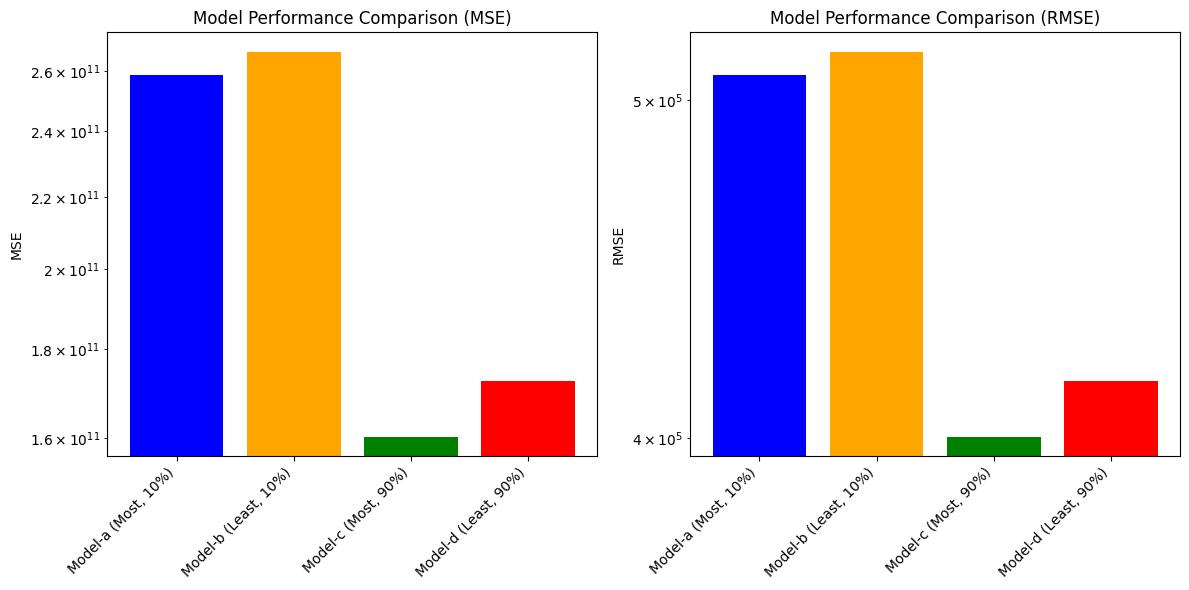

In [22]:
# Data for visualization
models = ['Model-a (Most, 10%)', 'Model-b (Least, 10%)', 'Model-c (Most, 90%)', 'Model-d (Least, 90%)']
mse_values = [mse_a, mse_b, mse_c, mse_d]
rmse_values = [rmse_a, rmse_b, rmse_c, rmse_d]

# Plotting MSE
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subplot for MSE
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('MSE')
plt.title('Model Performance Comparison (MSE)')
plt.yscale('log')  # Setting y-axis to log scale for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Plotting RMSE
plt.subplot(1, 2, 2)  # Subplot for RMSE
plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red'])
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (RMSE)')
plt.yscale('log')  # Setting y-axis to log scale for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


# Q.7 Answer:
Several ethical issues are highlighted in data visualization based on the two articles. For example, the Georgia COVID-19 graph manipulated the order of data to falsely suggest a decrease in cases, breaching ethical principles of accuracy and transparency. The Viborc guide stresses that ethical visualizations must prioritize clarity, avoid distortion, and provide proper context.

Similarly, the Olympic medal infographic may have ethical problems such as selective representation and lack of broader context. Emphasizing specific medal counts can skew the perceived performance of countries, resulting in biased interpretations. To prevent misleading narratives, it is crucial to ensure clarity and provide adequate context.
